**🚕 Automatidata — Fare Amount Prediction (Course 5)**

**Project Summary**:

This portfolio project builds a **multiple linear regression model** to predict taxi fare amounts using NYC Yellow Taxi trip data.  


**Table of Contents:**

1- Import Required Libraries & load the Dataset

2- Exploratory Data Analysis (EDA) & Data Cleaning

3- Outlier Handling  

4- Feature Engineering  

5- Modeling  

6- Evaluation & Results

7- Conclusions  

---

**1- Import Required Libraries & load the Dataset**

In [1]:
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
#This line is only run if we want to import data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df0= pd.read_csv('/content/drive/MyDrive/Data & Research 📉/Courses/Google Advanced Analytics Certificate/5- Regression Analysis/Project/Code/2017_Yellow_Taxi_Trip_Data.csv')

In [4]:
df= df0.copy()
print("The shape of the dataframe:", df.shape)

The shape of the dataframe: (22699, 18)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [6]:
# Check for missing data and duplicates
df.isna().sum()

,0
Unnamed: 0,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0


In [7]:
df.drop_duplicates()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [8]:
# Display dataset characteristics
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [9]:
# Convert datetime columns to datetime so we can work on them later
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Convert `tpep_dropoff_datetime` to datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

In [10]:
# Recheck the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [11]:
# Create `duration` column from the dropoff and pickup columns
df['duration']= (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) /np.timedelta64(1,'m')

**3- Outlier Handling**

We'll create a box plot for each of the following features to check for outliers: `trip_distance`, `fare_amount`, `duration`.

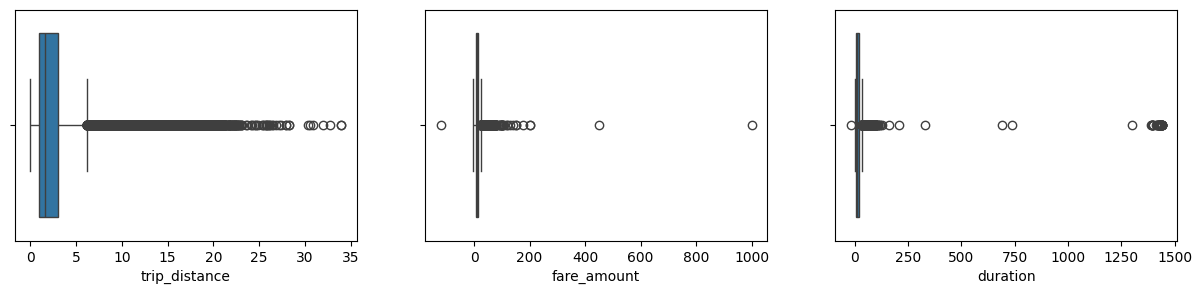

In [13]:
# Create 3 box plots
fig,axes= plt.subplots(1,3, figsize= (15,3))

sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])

plt.show()


Insights:

1. the 3 variables contain outliers but the most noticeable ones appear in trip distance.
2. It is possible that the extreme values in trip distance correspond to very long trips, the extreme values in fare amount and duration however don't make any sense.


To check trips with distance 0, we'll sort the column values, eliminate duplicates, and inspect the least 10 values to see are they rounded values or precise values?

In [14]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distance values are recorded with high accuracy. However, some trips may show a distance of zero if a passenger requested a taxi but then cancelled.

In [15]:
# Calculate the count of rides where the `trip_distance` is zero.
sum(df['trip_distance']==0)

148

148 out of 23,000 rides is really insignificant so we can just leave them.

#### `fare_amount` outliers

In [16]:
df['fare_amount'].describe()

,fare_amount
count,22699.000000
mean,13.026629
std,13.243791
min,-120.000000
25%,6.500000
50%,9.500000
75%,14.500000
max,999.990000


There are extreme values on both ends that make no sense

In [17]:
# Impute values less than $0 with 0
df.loc[df['fare_amount']<0, 'fare_amount'] = 0
df['fare_amount'].min()

0.0

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [18]:
def outlier_imputer(column_list, iqr_factor):

    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [19]:
# Apply the function to the 'fare amount'
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### `duration` outliers


In [20]:
# Call .describe() to check for duration outliers
df['duration'].describe()

,duration
count,22699.000000
mean,17.013777
std,61.996482
min,-16.983333
25%,6.650000
50%,11.183333
75%,18.383333
max,1439.550000


The duration column contains issues at both its lower and upper ends.

- High values: Extremely large durations should be treated similarly to the high-end fare outliers, using the rule: Q3 + (6 × IQR).
- Low values: Duration should never be negative, so all negative values should be replaced with 0.

In [21]:
# Replace any negative values with zero
df.loc[df['duration'] < 0, 'duration'] =0
df['duration'].min()

0.0

In [22]:
# Impute the high outliers using the imputer function
outlier_imputer(['duration'],6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



**4- Feature Engineering**

Create `mean_distance` column

Once deployed, the model will not have access to the trip duration beforehand, so this feature cannot be included during training. Still, we can leverage known trip statistics to infer information about unseen trips.

In this step, we create a new column, mean_distance, which represents the average distance for each set of trips that have the same pickup and dropoff locations.



In [23]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(2)

,pickup_dropoff
0,100 231
1,186 43


In [24]:
# We'll group by the new column and compute the mean
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [25]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

In [26]:
# Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# Map `grouped_dict` to the `mean_distance` column so that it contains the values of the dict
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Check that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [27]:
grouped= df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]

# Create a dictionary where keys are the unique pickup_dropoffs and the values are mean trip duration for all trips with those pickup_dropoffs
grouped_dict= grouped.to_dict()
grouped_dict= grouped_dict['duration']

# map 'grouped dict to the mean duration column
df['mean_duration']= df['pickup_dropoff']
df['mean_duration']= df['mean_duration'].map(grouped_dict)
df['mean_duration'].head()


,mean_duration
0,22.847222
1,24.470370
2,7.250000
3,30.250000
4,14.616667


Create `day` and `month` columns

Extract name of the day and month from the `tpep_pickup_datetime` column.

In [28]:
# Create 'day' column
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' column
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

Create `rush_hour` column

A rush hour as:
* Any weekday except weekend (Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column where 1 means the ride is during rush hour and 0 otherwise.

In [29]:
# Create 'rush_hour' column
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

def compute_rush_hour(row):
  if row['day'] in ['saturday', 'sunday']:
    return 0
  if 6 <= row['rush_hour'] < 10 or 16 <= row['rush_hour'] < 20:
    return 1
  return 0

df['rush_hour'] = df.apply(compute_rush_hour, axis=1)
df.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


**5- Modelling**

a) Checking relationships

<Axes: xlabel='mean_duration', ylabel='fare_amount'>

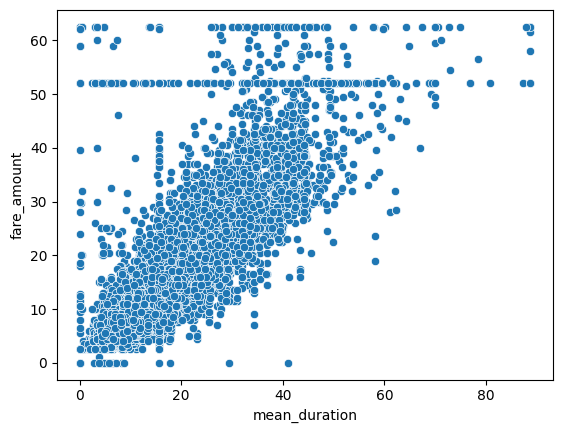

In [30]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.scatterplot(x= df['mean_duration'], y= df['fare_amount'])

The mean_duration feature shows a strong relationship with the target variable. However, there are noticeable horizontal lines near fare amounts of approximately 52 and 63. What do these values represent, and how many records fall into each line?

In [31]:
# Check records where the fare amount is greater than 50
df[df['fare_amount'] > 50] ['fare_amount'].value_counts().head()

,count
fare_amount,
52.0,514
62.5,84
59.0,9
50.5,9
57.5,8


In [32]:
# Check some of the records where the fare amount is 52 USD
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0


By looking at some of the trips where the fare is 52 USD, we notice that either the pickup or the dropoff duration ID is 132 and they have a rate code ID= 2. By checking the data dictionary, we see that rate code ID 2 belongs to trips to JFK airport which justify the high fare amount.

b) Preparation & training

In [33]:
df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


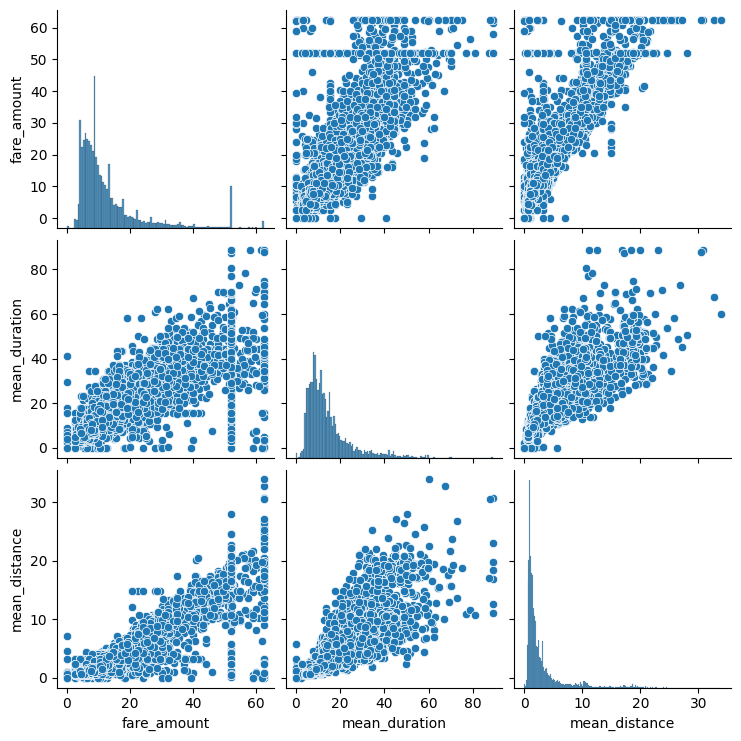

In [34]:
# Create a pairplot to see the relationships between variables in the data
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']])

In [35]:
# Create a correlation matrix to determine the most correlated variables
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


<Axes: >

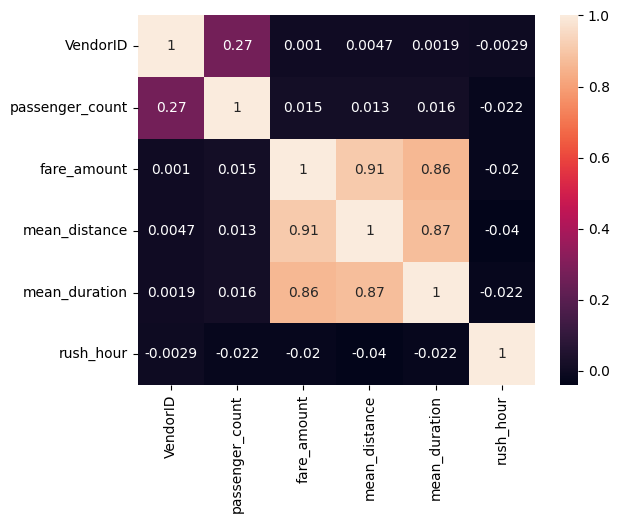

In [36]:
# Create a correlation heatmap
matrix= df2.corr(method='pearson')

sns.heatmap(matrix, annot=True)


We can notice that mean distance and main duration are highly correlated to fare amount (target variable), they're also correlated with each other.

Separate the predictor variables (X features) and the target variable (y)


In [37]:
# Remove the target column from the features
X= df2.drop(columns= ['fare_amount'])

# Set y variable
y= df2[['fare_amount']]

X.head()


,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


Edit the vendor id type and dummy encode the categorical variables

In [38]:
# Convert VendorID to string
X['VendorID']= X['VendorID'].astype('str')

# Create dummies
X= pd.get_dummies(X, drop_first= True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,True
1,1,3.108889,24.470370,0,False
2,1,0.881429,7.250000,1,False
3,1,3.700000,30.250000,0,True
4,1,4.435000,14.616667,0,True


Create training and testing sets with a test size of 20% of the total records.

In [39]:
# Create training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

Standardize the data

Use `StandardScaler()` to standardize the features and assign the results to the variable `X_train_scaled`.

In [40]:
# Standardize the X variables
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_train_scaled

array([[-0.50301524,  0.8694684 ,  0.17616665, -0.64893329,  0.89286563],
       [-0.50301524, -0.60011281, -0.69829589,  1.54099045,  0.89286563],
       [ 0.27331093, -0.47829156, -0.57301906, -0.64893329, -1.11998936],
       ...,
       [-0.50301524, -0.45121122, -0.6788917 , -0.64893329, -1.11998936],
       [-0.50301524, -0.58944763, -0.85743597,  1.54099045, -1.11998936],
       [ 1.82596329,  0.83673851,  1.13212101, -0.64893329,  0.89286563]])

Fit the model

Instantiate a regression model and fit it to the training data.

In [41]:
# Fit your model to the training data
lr= LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

**6- Evaluation & Results**

Training data

In [42]:
# Evaluate the model performance on the training data
r_squ= lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_squ)

y_pred_train= lr.predict(X_train_scaled)

print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8398434585044773
R^2: 0.8398434585044773
MAE: 2.186666416775414
MSE: 17.88973296349268
RMSE: 4.229625629236313


Testing data

In [43]:
# Scale the X_test data before checking the performance
X_test_scaled= scaler.transform(X_test)
X_test_scaled

array([[-0.50301524, -0.01228033, -0.1109662 , -0.64893329,  0.89286563],
       [-0.50301524,  0.1705781 ,  0.83266676, -0.64893329,  0.89286563],
       [ 0.27331093, -0.56800902, -0.71163492, -0.64893329,  0.89286563],
       ...,
       [-0.50301524, -0.5294519 , -0.64990563, -0.64893329,  0.89286563],
       [-0.50301524, -0.53660633, -0.83261981, -0.64893329, -1.11998936],
       [-0.50301524, -0.29519336, -0.17972406,  1.54099045,  0.89286563]])

In [44]:
# Calculate the same metrics for the testing data

y_pred_test= lr.predict(X_test_scaled)

print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

R^2: 0.8682583641795454
MAE: 2.1336549840593864
MSE: 14.326454156998942
RMSE: 3.7850302716093225


In [45]:
# Create a `results` dataframe
results= pd.DataFrame(data= {'actual': y_test['fare_amount'], 'predicted': y_pred_test.ravel()})
results['residual']= results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.356503,1.643497
18134,28.0,16.314595,11.685405
4655,5.5,6.726789,-1.226789
7378,15.5,16.227206,-0.727206
13914,9.5,10.536408,-1.036408


Visualize model results

Text(0.5, 1.0, 'Actual vs Predicted')

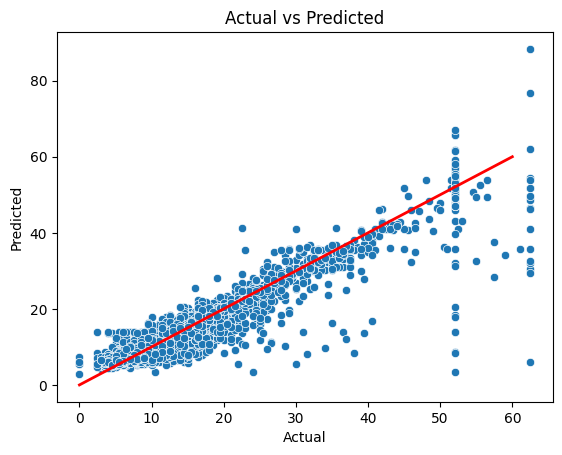

In [46]:
# Create a scatterplot to visualize `predicted` vs `actual`
sns.scatterplot(x= 'actual', y= 'predicted', data= results)

# Draw a line to show the shape of a perfect model
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

Visualize the distribution of the `residuals` using a histogram.

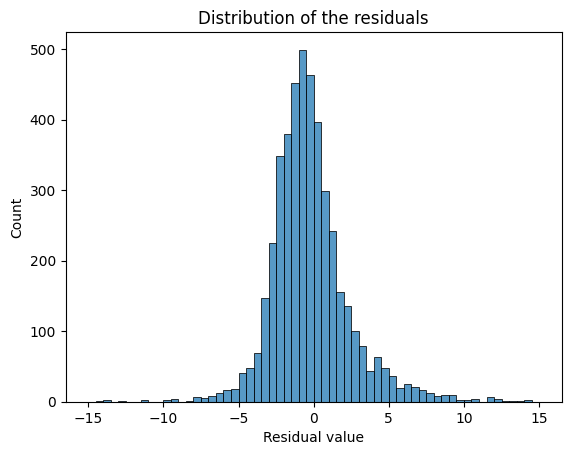

In [47]:
# Create a histogram to isualize the distribution of the `residuals`
sns.histplot(x= results['residual'], bins= np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('Residual value')
plt.ylabel('Count');

The distribution of the residuals is almost normal which matches the assumption of normality confirming that linear regression is the right model to use.

Create a scatterplot of `residuals` over `predicted`.

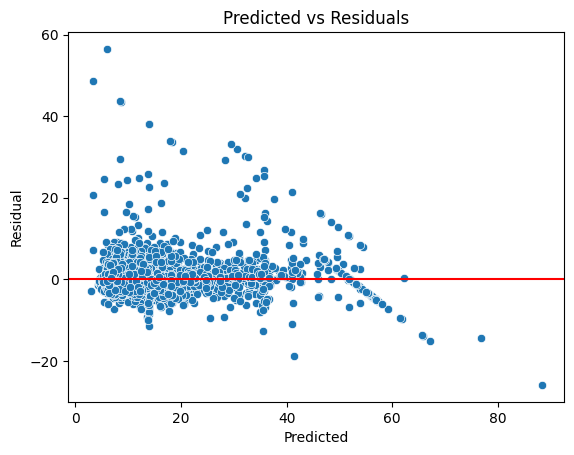

In [48]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x= 'predicted', y= 'residual', data= results)
plt.title('Predicted vs Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(0, c='red')

The residuals are spread evenly above and below zero, with the only exception being the diagonal lines stretching from the top-left to the bottom-right.

Model coefficients

In [49]:
# Display the model's coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.030825,7.133867,2.812115,0.110233,-0.054373


The coefficients determine the magnitude and direction of effect(positive or negative) of the predictor variables on the dependent variable. The mean duration and mean distance have the strongest effect on the target variable and since we scaled the data before building the model The correct interpretation of the mean distance coefficient is: controlling for other variables, for every +1 change in standard deviation, the fare amount increases by a mean of 7.13 USD.

To know exactly how many miles we have to go for the fare to increase by this amount, we have to calculate the standard deviation of the mean distance in the training data before scaling. So, for every 3.57 miles traveled, the fare increased by a mean of 7.13 USD. Or for every 1 mile traveled, the fare increased by a mean of 2.00 USD.

In [50]:
print(X_train['mean_distance'].std())

3.574812975256415


**7- Conclusions**

1. Building a strong regression model often involves a thorough process of feature selection where the most powerful predictor variables are selected to estimate the target variable.

2. Detecting data issues such as missing values and outliers and implementing effective methods to mitigate them is crucial before training the model, this could be true only for some models because models like decision trees are robust to outliers.


3. Calculating the model's coefficients helps us understand the magnitude and direction of effect of the independent variables on the target variable and in business context, this is useful for stakeholders to determine how different factors affect the target variable they're trying to address.


4. When presenting the results to stakeholders, we should address how well the assumptions were satisfied and report key performance metrics such as MAE and RMSE and mention how each metric is useful in evaluating the model's performance.

